<a href="https://colab.research.google.com/github/kapil0808/Kaggle-first-problem/blob/main/Sentiment_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK tools for text processing
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [24]:
!pip install google_trans_new
import google_trans_new
print(google_trans_new.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [25]:
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_customers_dataset.csv')
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [26]:
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_order_reviews_dataset.csv')
review_df.head(2)
review_df.shape
review_df.isnull().sum()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


(100000, 7)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [27]:
review_data_title = review_df['review_comment_title']
review_data = review_df.drop(['review_comment_title'],axis=1)

In [28]:
review_data  = review_data.dropna()
review_data_title = review_data_title.dropna()

In [29]:
review_data.head(3)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [30]:
review_data_title.head(3)

9                   recomendo
15            Super recomendo
19    Não chegou meu produto 
Name: review_comment_title, dtype: object

In [31]:
review_data = review_data.reset_index(drop=True)
review_data.shape
review_data_title.shape

(41753, 6)

(11715,)

In [41]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
 comments = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

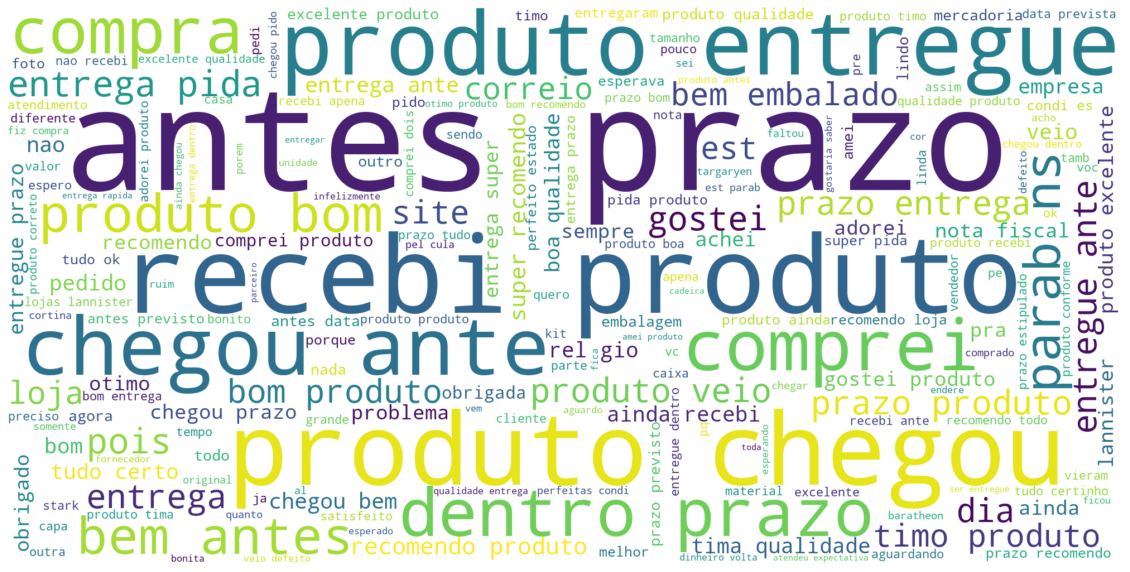

In [43]:
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(comments)
important_unigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)
important_unigrams = important_unigrams.reset_index()
important_unigrams.rename(columns={'index':'unigrams',0:'frequency'},inplace=True)

important_unigrams.head(5)

,unigrams,frequency
0,produto,18866
1,prazo,8543
2,entrega,6683
3,antes,5655
4,chegou,5643


In [49]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(comments)
important_bigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)
important_bigrams=important_bigrams.reset_index()
important_bigrams.rename(columns={'index':'bigrams',0:'frequency'},inplace=True)

important_bigrams.head(5)

,bigrams,frequency
0,antes prazo,4207
1,recebi produto,1942
2,produto chegou,1720
3,produto entregue,1616
4,chegou antes,1465


In [51]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(comments)
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)
important_trigrams=important_trigrams.reset_index()
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True)

important_trigrams.head(5)

,trigrams,frequency
0,chegou antes prazo,1112
1,bem antes prazo,708
2,entregue antes prazo,608
3,produto chegou antes,448
4,entrega antes prazo,433


<Figure size 1008x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


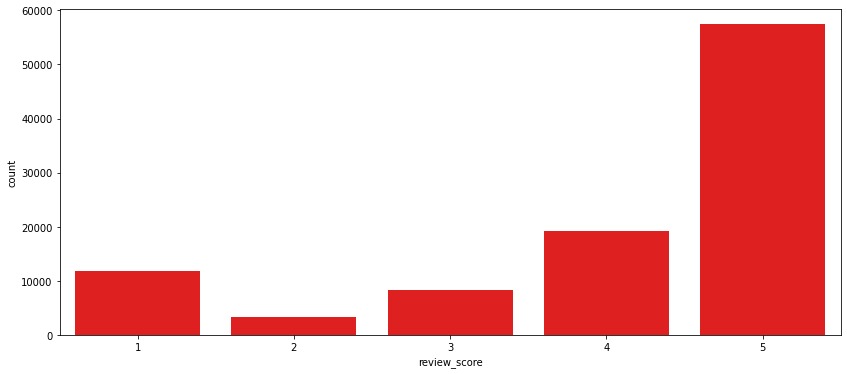

In [53]:
plt.figure(figsize = (14,6))
sns.countplot(review_df['review_score'], color= 'red')

<Figure size 1008x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


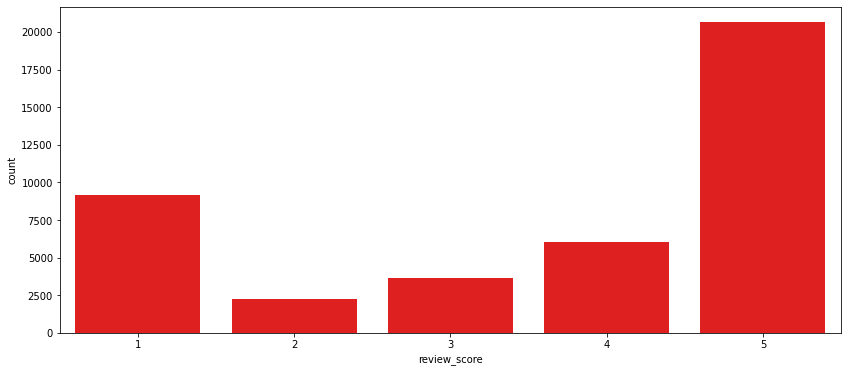

In [54]:
plt.figure(figsize = (14,6))
sns.countplot(review_data['review_score'], color= 'red')

In [55]:
comments_titles = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data_title:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    
    comments_titles.append(' '.join(filtered_result))

Text(0.5, 0, 'Review Length (words)')

Text(0, 0.5, 'Frequency')

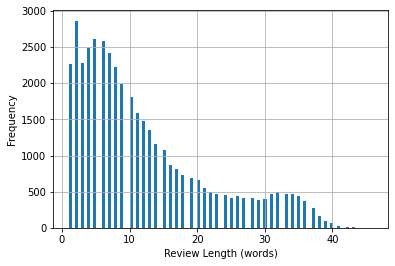

In [56]:
words_per_review = review_data.review_comment_message.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [57]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 12.047804948147439
Skewness: 1.0577282382939468


In [ ]:
# Mapping the ratings
review_data['Sentiment_rating'] = np.where(review_data.review_score > 3,1,0)

# Removing neutral reviews 
review_data = review_data[review_data.review_score != 3]

# Printing the counts of each class
review_data['Sentiment_rating'].value_counts()